In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
#n_samples=>n.o of samples 
#classes=>2 means 0 & 1 binary output
#weights =1,1 means equal set(weightage) of data for 0 and 1

In [3]:
x.shape

(2000, 20)

In [4]:
x

array([[-0.62070677,  1.39769519,  0.1034997 , ..., -0.34409714,
         0.62197727, -1.79645246],
       [ 0.90592186,  1.9199751 , -0.7783715 , ..., -1.30560469,
        -1.54476766, -0.24532071],
       [ 0.27902104,  0.85887666,  1.20780417, ...,  2.50374447,
        -0.16497195, -1.95912025],
       ...,
       [ 0.40426899, -0.61988039,  0.87588292, ...,  0.61529851,
         0.97573222,  1.77717222],
       [-0.02512151, -1.05618212, -0.2345739 , ..., -1.6839064 ,
        -0.33327389,  1.13979455],
       [-1.46739126, -0.12314487,  0.66858242, ...,  1.92945851,
        -0.97878106, -2.77522263]])

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

<AxesSubplot:xlabel='label', ylabel='count'>

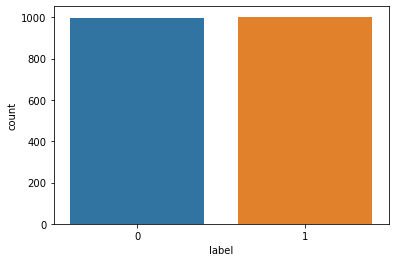

In [6]:
y1=pd.DataFrame(y,columns=['label'])
sns.countplot(x='label',data=y1)
#displayed as 0 & 1 in equal size

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)


In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(xtrain,ytrain)

#For xtrain ,finding roc auc score
ytrain_pred=rf_model.predict_proba(xtrain)
print('RF train roc-auc: {}'.format(roc_auc_score(ytrain,ytrain_pred[:,1])))

#xFor xtest ,finding roc auc score
ytest_pred=rf_model.predict_proba(xtest)
print('RF train roc-auc: {}'.format(roc_auc_score(ytest,ytest_pred[:,1])))

RF train roc-auc: 1.0
RF train roc-auc: 0.9808666666666667


In [10]:
#creating a series dataframe l to concatenate all a,b,c seriese's ytrain_pred data

l=[]
a=pd.Series(ytrain_pred[:,0])#0's ytrain prediction
a=a.rename('prob(0)')
b=pd.Series(ytrain_pred[:,1])#1's prediction
b=b.rename('prob(1)')

c=pd.Series(ytrain)
c=c.rename('ytrain')
c.head()

0    0
1    0
2    1
3    1
4    0
Name: ytrain, dtype: int64

In [11]:
l=pd.concat([pd.Series(a),pd.Series(b),pd.Series(c)],axis=1)
l
#concatenating serieses a,b,c 

,prob(0),prob(1),ytrain
0,1.00,0.00,0
1,0.97,0.03,0
2,0.01,0.99,1
3,0.01,0.99,1
4,1.00,0.00,0
...,...,...,...
1395,0.00,1.00,1
1396,0.05,0.95,1
1397,0.98,0.02,0
1398,0.99,0.01,0


RandomForestClassifier()train roc-auc: 1.0
RandomForestClassifier()train roc-auc: 0.9809611111111111


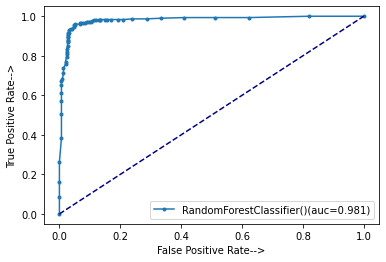


LogisticRegression()train roc-auc: 0.9863568922694498
LogisticRegression()train roc-auc: 0.9885777777777777


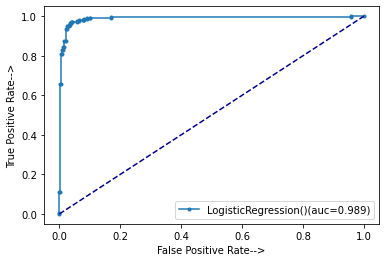


AdaBoostClassifier()train roc-auc: 0.9975081174960356
AdaBoostClassifier()train roc-auc: 0.9826111111111111


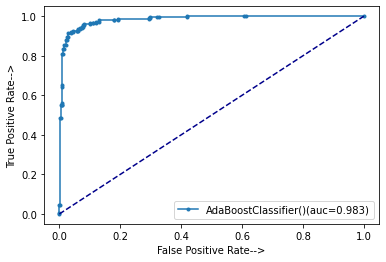


KNeighborsClassifier()train roc-auc: 0.981670071491109
KNeighborsClassifier()train roc-auc: 0.9426111111111111


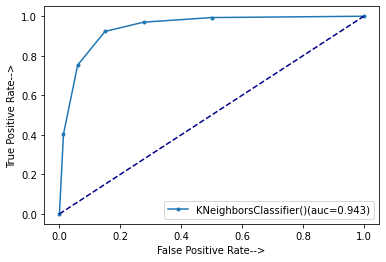

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

#Creating models for all these
rf_model=RandomForestClassifier()
log_classifier=LogisticRegression()
ada_classifier=AdaBoostClassifier()
knn_classifier=KNeighborsClassifier()#based on nearest neighbor

classifiers=[rf_model,log_classifier,ada_classifier,knn_classifier]
#iterate all the above models through this classifier
#then using each model, it fit the training data and using that training data,will predict testing data
#using this testing data, will plot roc auc curve and show how the model performs
for classifier in classifiers:
    classifier.fit(xtrain,ytrain)
    
    #ytrain_pred
    ytrain_pred=classifier.predict_proba(xtrain)
    print(f'{classifier}train roc-auc: {roc_auc_score(ytrain,ytrain_pred[:,1])}')
    #using 1's in l series
    
    #ytest pred
    ytest_pred=classifier.predict_proba(xtest)
    print(f'{classifier}train roc-auc: {roc_auc_score(ytest,ytest_pred[:,1])}')
    
    ytest_pred=classifier.predict_proba(xtest)
    fpr,tpr,threshold=roc_curve(ytest,ytest_pred[:,1])
    auc1=auc(fpr,tpr)
    
    plt.plot(fpr,tpr,marker='.',label=f'{classifier}(auc=%0.3f)'%auc1)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate-->')
    plt.ylabel('True Positive Rate-->')
    
    plt.legend()
    plt.show()
    
    print()

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(xtest)[:,1]))
    
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(ytest,final_prediction)))

Ensemble test roc-auc: 0.9846777777777778


In [14]:
pred
#concatenated predictions

[0      0.97
 1      0.00
 2      0.97
 3      0.91
 4      0.52
        ... 
 595    0.00
 596    0.03
 597    0.99
 598    0.01
 599    0.97
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [15]:
#splitting this into different columns then

a=pd.concat(pred,axis=1)
a

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.91,0.761539,0.509875,0.8
4,0.52,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [16]:
final_prediction

0      0.880262
1      0.115823
2      0.818783
3      0.745353
4      0.547447
         ...   
595    0.121340
596    0.117845
597    0.876697
598    0.163217
599    0.829857
Length: 600, dtype: float64

In [17]:
fpr,tpr,thresholds=roc_curve(ytest,final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.9034413 , 0.90327475, 0.80806516,
       0.8080558 , 0.7944465 , 0.79412833, 0.78675879, 0.78571156,
       0.75141018, 0.75037124, 0.74180851, 0.74137362, 0.71525211,
       0.71393711, 0.67518151, 0.66993537, 0.60906376, 0.60486186,
       0.59077749, 0.58425354, 0.58146627, 0.58114346, 0.57995356,
       0.56800386, 0.56792732, 0.55889283, 0.55838469, 0.55469563,
       0.54558969, 0.53877948, 0.51865858, 0.49116892, 0.4346034 ,
       0.38655357, 0.38629719, 0.34636723, 0.34586612, 0.24099466,
       0.23890421, 0.23698424, 0.23646893, 0.20102808, 0.19348417,
       0.12052718, 0.1203351 , 0.10498954])

In [18]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_ls=[]

for thres in thresholds:
    ypred=np.where(final_prediction>thres,1,0)
    
    accuracy_ls.append(accuracy_score(ytest,ypred,normalize=True))
    
accuracy_ls=pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls.head()
#listing thresholds with high accuracy

,thresholds,accuracy
34,0.434603,0.961667
33,0.491169,0.958333
32,0.518659,0.956667
31,0.538779,0.953333
30,0.545590,0.951667


In [19]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

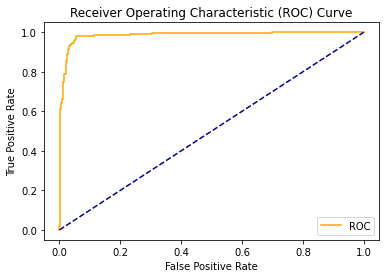

In [20]:
plot_roc_curve(fpr,tpr)